# SOUTH GERMAN CREDIT RISK ANALYSIS

Variable name: status

Content: status of the debtor's checking account with the bank

Variable name: duration

Content: credit duration in months (quantitative)

Variable name: credit_history

Content: history of compliance with previous or concurrent credit contracts (categorical)

Variable name: purpose

Content: purpose for which the credit is needed (categorical)

Variable name: amount

Content: credit amount in DM (quantitative; result of monotonic transformation; actual data and type of
transformation unknown)

Variable name: savings

Content: debtor's savings (categorical)

Variable name: employment_duration

Content: duration of debtor's employment with current employer (ordinal; discretized quantitative)

Variable name: installment_rate

Content: credit installments as a percentage of debtor's disposable income (ordinal; discretized quantitative)

Variable name: personal_status_sex

Content: combined information on sex and marital status; categorical; sex cannot be recovered from the
variable, because male singles and female non-singles are coded with the same code (2); female widows cannot
be easily classified, because the code table does not list them in any of the female categories

Variable name: other_debtors

Content: Is there another debtor or a guarantor for the credit? (categorical)

Variable name: present_residence

Content: length of time (in years) the debtor lives in the present residence (ordinal; discretized quantitative)

Variable name: property

Content: the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used, if codes 3
or 4 are not applicable and there is a car or any other relevant property that does not fall under variable
sparkont. (ordinal)

Variable name: age

Content: age in years (quantitative)

Variable name: other_installment_plans

Content: installment plans from providers other than the credit-giving bank (categorical)

Variable name: housing

Content: type of housing the debtor lives in (categorical)

Variable name: number_credits

Content: number of credits including the current one the debtor has (or had) at this bank (ordinal, discretized
quantitative); contrary to Fahrmeir and Hamerle (1984) statement, the original data values are not available.

Variable name: job

Content: quality of debtor's job (ordinal)

Variable name: people_liable

Content: number of persons who financially depend on the debtor (i.e., are entitled to maintenance) (binary,
discretized quantitative)

Variable name: telephone

Content: Is there a telephone landline registered on the debtor's name? (binary; remember that the data are
from the 1970s)

Variable name: foreign_worker

Content: Is the debtor a foreign worker? (binary)

Variable name: credit_risk

Content: Has the credit contract been complied with (good) or not (bad) ? (binary)


In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import plotly.figure_factory as ff


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [156]:
sgc=pd.read_csv(r"F:\machine learning by cognibot\my project tech phanthons\SGC.csv")

In [157]:
sgc=sgc.drop('Id',axis=1) #Here,i am just droped the column "Id" because, it is not usefull

In [158]:
columns =['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate',
          'personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing',
          'number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
#here i just changed the column names from german to english for understand

### The Updated Dataset 

In [159]:
sgc.columns=columns
sgc.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1


In [160]:
sgc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   800 non-null    int64
 1   duration                 800 non-null    int64
 2   credit_history           800 non-null    int64
 3   purpose                  800 non-null    int64
 4   amount                   800 non-null    int64
 5   savings                  800 non-null    int64
 6   employment_duration      800 non-null    int64
 7   installment_rate         800 non-null    int64
 8   personal_status_sex      800 non-null    int64
 9   other_debtors            800 non-null    int64
 10  present_residence        800 non-null    int64
 11  property                 800 non-null    int64
 12  age                      800 non-null    int64
 13  other_installment_plans  800 non-null    int64
 14  housing                  800 non-null    int64
 15  number

In [161]:
sgc.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

<AxesSubplot:>

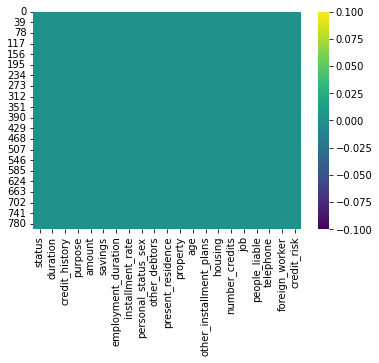

In [162]:
sns.heatmap(df.isnull(),cmap='viridis')

## threfore there is no null values in the data set

## DEEP ANALYSIS OF DATA SET

In [163]:
sgc.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1


In [164]:
sgc['credit_risk'].value_counts()

1    600
0    200
Name: credit_risk, dtype: int64

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

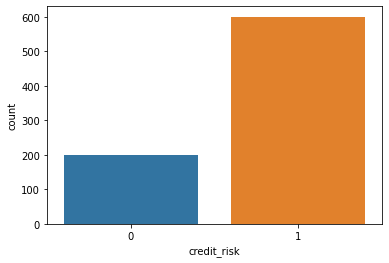

In [165]:
sns.countplot(x='credit_risk',data=sgc) #here 0 is good and 1 is bad

In [166]:
#here, some numerical coloums in the dataset which is duration,amount,age
n=['duration','amount','age']
sgc[n].describe()

,duration,amount,age
count,800.000000,800.000000,800.000000
mean,20.496250,3210.290000,35.542500
std,12.006881,2792.840814,11.175724
min,4.000000,250.000000,19.000000
25%,12.000000,1364.000000,27.000000
50%,18.000000,2264.000000,33.000000
75%,24.000000,3907.250000,42.000000
max,72.000000,18424.000000,75.000000


# What is the purpose for credit and check if their Credit_risk is good or bad based upon their credit_history(previous credits by person)?


### Purpose       0 : 'others',      1 : 'car (new)',             2 : 'car (used)',          3 : 'furniture/equipment',             4 : 'radio/television',              5 : 'domestic appliances',             6 : 'repairs' ,           7 : 'education',              8 : 'vacation',           9 : 'retraining',            10 : 'business'

### Credit_history           0 : 'delay in paying off in the past',              1 : 'critical account/other credits elsewhere',             2 : 'no credits taken/all credits paid back duly',               3 : 'existing credits paid back duly till now',                 4 : 'all credits at this bank paid back duly'

### Credit_risk         0 : good for credit      1:   bad  or not good


In [167]:
d=sgc.groupby(['purpose','credit_history'])['credit_risk'].mean().sort_values(ascending=False).reset_index()
d

,purpose,credit_history,credit_risk
0,4,4,1.000000
1,1,3,1.000000
2,8,1,1.000000
3,8,2,1.000000
4,8,4,1.000000
5,4,1,1.000000
6,8,0,1.000000
7,1,1,1.000000
8,10,3,1.000000
9,10,2,1.000000


<AxesSubplot:xlabel='purpose', ylabel='credit_risk'>

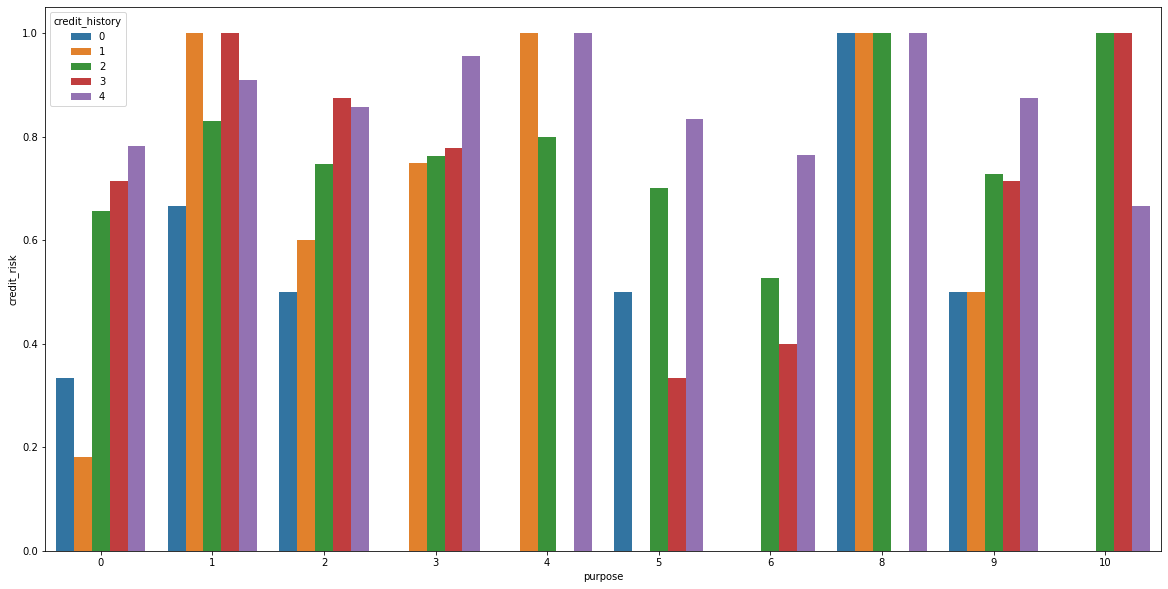

In [168]:
plt.figure(figsize=(20,10))
sns.barplot(x='purpose',y='credit_risk',hue='credit_history',data=d)

# Sex With Credit Risk Based On Installment_rates

In [169]:
e=sgc.groupby(['personal_status_sex','installment_rate'])['credit_risk'].mean().sort_values(ascending=False).reset_index()
e

,personal_status_sex,installment_rate,credit_risk
0,1,3,1.000000
1,1,2,0.928571
2,3,1,0.847826
3,4,3,0.833333
4,3,2,0.800000
5,2,2,0.796296
6,2,1,0.792453
7,3,3,0.780822
8,3,4,0.751092
9,4,2,0.733333


<AxesSubplot:xlabel='personal_status_sex,installment_rate,credit_risk'>

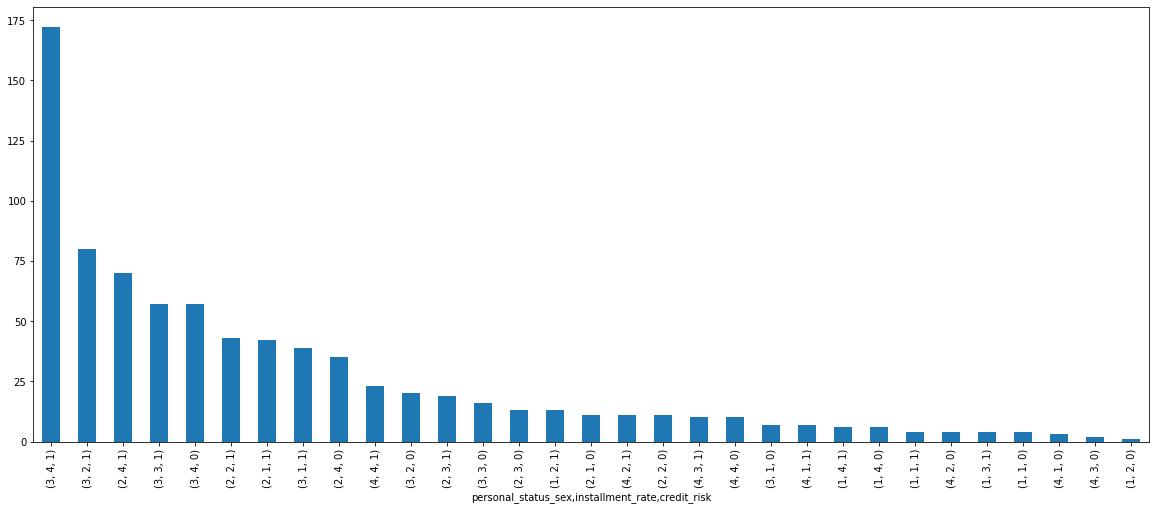

In [170]:
plt.figure(figsize=(20,8))
sgc.groupby(['personal_status_sex','installment_rate'])['credit_risk'].value_counts().sort_values(ascending=False).plot(kind='bar')

# Job with Credit risk based on a person. whether he/she is a Foreign worker or not?

In [171]:
sgc['foreign_worker'].value_counts()   #here 1=yes ,2=no

2    766
1     34
Name: foreign_worker, dtype: int64

In [172]:
f=sgc.groupby(['job','foreign_worker'])['credit_risk'].mean().sort_values(ascending=False).reset_index()
f



#here for job 1 : 'unemployed/unskilled - non-resident',
#2 : 'unskilled-resident',3 : 'skilled employee/official',4 : 'manager/self-employed/highly qualified employee'

,job,foreign_worker,credit_risk
0,1,1,1.000000
1,2,1,1.000000
2,3,1,0.937500
3,2,2,0.760563
4,3,2,0.748980
5,4,2,0.713043
6,1,2,0.631579
7,4,1,0.333333


# Installment Rate ,Job,Employment Duration with Credit Risk

In [173]:
h=sgc.groupby(['installment_rate','job','employment_duration'])['credit_risk'].value_counts()
h


#here, installment rate for 1 : '35 or more', 2 : '25 to 35', 3 : '20 to 25', 4 : 'less than 20'
# employement duration 1 : 'unemployed',2 : 'less than 1 year', 3 : '1 to 4 yrs', 4 : '4 to 7 yrs', 5 : '7 yrs or more'

installment_rate  job  employment_duration  credit_risk
1                 1    1                    1               4
                                            0               2
                       3                    1               1
                  2    2                    1              10
                                            0               2
                                                           ..
4                 4    3                    0               2
                       4                    1               8
                                            0               2
                       5                    1              13
                                            0               9
Name: credit_risk, Length: 114, dtype: int64

<Figure size 1800x720 with 0 Axes>

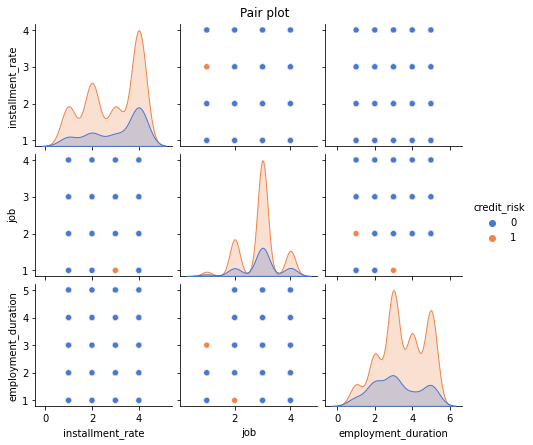

In [174]:
plt.figure(figsize=(25,10))
sns.pairplot(data=sgc,
             vars = ['installment_rate','job','employment_duration'],  
             kind="scatter",                        
             diag_kind="kde",                  
             hue='credit_risk',
             height=2,
             aspect=1.1,
             palette="muted"
             )

plt.suptitle("Pair plot", y=1.02)   
plt.show()

## Finally 

### Correlation

In [176]:
z=sgc.corr()
z

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
status,1.000000,-0.061875,0.200746,0.048367,-0.046179,0.194128,0.124235,0.011159,0.037605,-0.149470,...,-0.025172,0.057873,0.075229,0.010417,0.078500,0.045783,0.017806,0.069530,0.034981,0.338864
duration,-0.061875,1.000000,-0.104558,0.123985,0.633837,0.060331,0.040891,0.067341,0.017962,-0.033319,...,0.313027,-0.021195,-0.048868,0.180119,-0.048292,0.211473,0.034983,0.170775,0.142461,-0.188310
credit_history,0.200746,-0.104558,1.000000,-0.084822,-0.062988,0.035090,0.128223,0.030229,0.028785,-0.031270,...,-0.038588,0.179632,0.194204,0.054755,0.450637,0.010358,-0.018131,0.053842,-0.001099,0.229800
purpose,0.048367,0.123985,-0.084822,1.000000,0.059389,-0.017706,0.036595,0.043147,-0.019936,-0.006199,...,0.010090,0.015053,-0.099491,0.037090,0.051137,-0.006346,0.037829,0.074890,0.117252,-0.023707
amount,-0.046179,0.633837,-0.062988,0.059389,1.000000,0.068256,-0.042872,-0.275210,-0.011889,-0.026118,...,0.317258,0.020706,-0.035665,0.150883,-0.039061,0.271071,-0.030990,0.285864,0.028530,-0.137515
savings,0.194128,0.060331,0.035090,-0.017706,0.068256,1.000000,0.136748,0.019063,0.007841,-0.115848,...,0.019604,0.073814,0.022783,-0.013802,-0.051418,-0.000767,-0.022125,0.093448,-0.019944,0.161292
employment_duration,0.124235,0.040891,0.128223,0.036595,-0.042872,0.136748,1.000000,0.139715,0.092085,-0.016063,...,0.091126,0.243963,-0.014281,0.098030,0.112053,0.108581,-0.127112,0.091812,0.042701,0.113270
installment_rate,0.011159,0.067341,0.030229,0.043147,-0.275210,0.019063,0.139715,1.000000,0.122127,0.003414,...,0.064126,0.067389,-0.003730,0.095744,0.033783,0.113897,0.097828,0.018358,0.105954,-0.080210
personal_status_sex,0.037605,0.017962,0.028785,-0.019936,-0.011889,0.007841,0.092085,0.122127,1.000000,0.026368,...,-0.002655,0.010548,-0.044485,0.096432,0.045938,0.014435,-0.142611,0.024519,-0.085654,0.043531
other_debtors,-0.149470,-0.033319,-0.031270,-0.006199,-0.026118,-0.115848,-0.016063,0.003414,0.026368,1.000000,...,-0.149506,-0.036346,-0.031670,-0.056457,-0.023929,-0.046642,-0.001280,-0.085703,-0.145788,0.010696


### Heatmap

<AxesSubplot:>

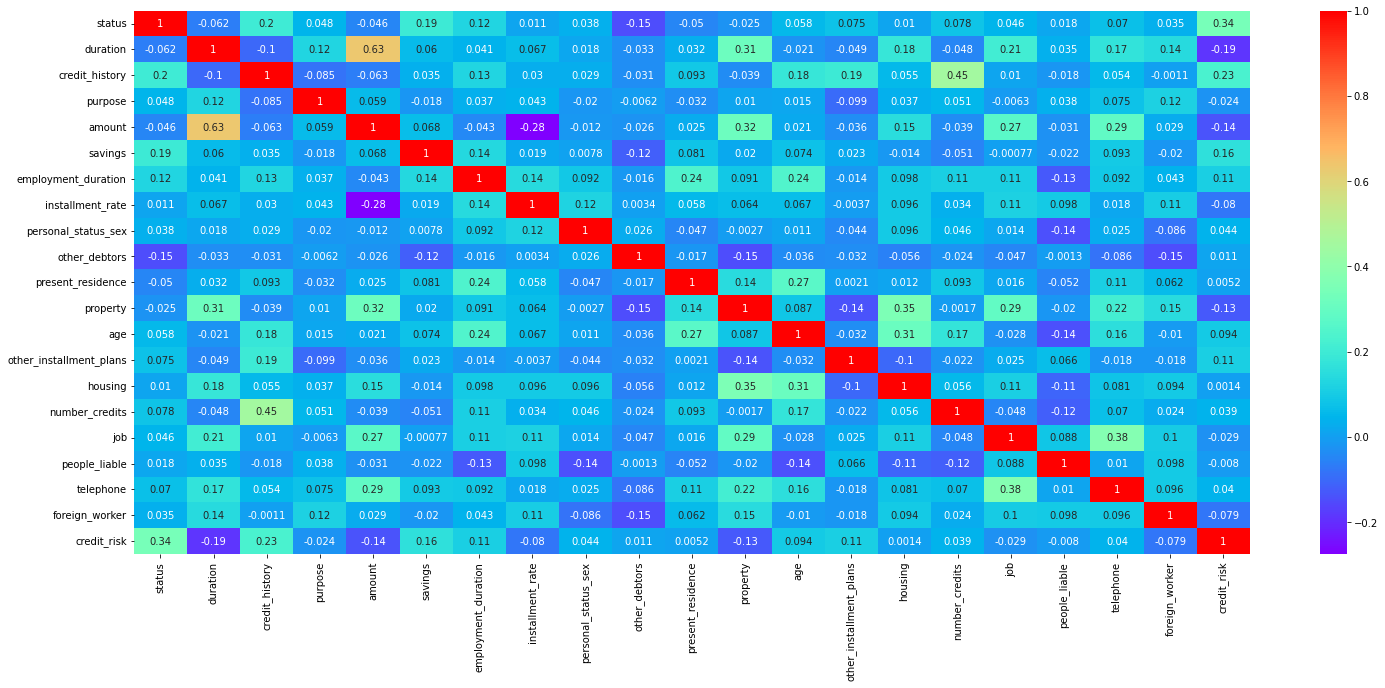

In [177]:
plt.figure(figsize=(25,10))
sns.heatmap(z,annot=True,cmap='rainbow')

# Model Building

In [178]:
x=sgc.drop('credit_risk',axis=1)
y=sgc['credit_risk']

### Train Test split

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)

x_train (640, 20)
x_test (160, 20)


### Fitting the values into Decision Tree Classifier

In [180]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

### Accuracy

In [181]:
print("Accuracy ",accuracy_score(y_test,y_pred)*100)

Accuracy  71.875


### Confusion matrix

In [182]:
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix is\n',cm)

confusion matrix is
 [[23 23]
 [22 92]]


### Classification Report (Precision and Recall)

In [183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.51        46
           1       0.80      0.81      0.80       114

    accuracy                           0.72       160
   macro avg       0.66      0.65      0.65       160
weighted avg       0.72      0.72      0.72       160

